
# Mask Detection Image Classifier

This project classifies whether a person is wearing a mask or not using deep learning on a Kaggle dataset. Below improvements are included:
- Exploratory Data Analysis
- Image Augmentation Visualization
- Transfer Learning with MobileNetV2
- Evaluation: Confusion Matrix & Classification Report
- Enhanced plotting & code comments


In [ ]:
!pip install kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/omkargurav/face-mask-dataset')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:00<00:00, 772MB/s] 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask = os.listdir('/content/face-mask-dataset/data/with_mask')

In [ ]:
without_mask = os.listdir('/content/face-mask-dataset/data/without_mask')

In [ ]:
print('Number of with mask images:', len(with_mask))
print('Number of without mask images:', len(without_mask))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
#creating labels for the 2 class of images

#with mask = 1 and without mask = 0 (labels)

with_mask_labels = [1]*len(with_mask)
without_mask_labels = [0]*len(without_mask)


In [ ]:
#total labels

labels = with_mask_labels + without_mask_labels
#starts with 1 and ends with 0
print(len(labels))

7553


In [ ]:
print(with_mask[0])
print(without_mask[0])

with_mask_1361.jpg
without_mask_2553.jpg


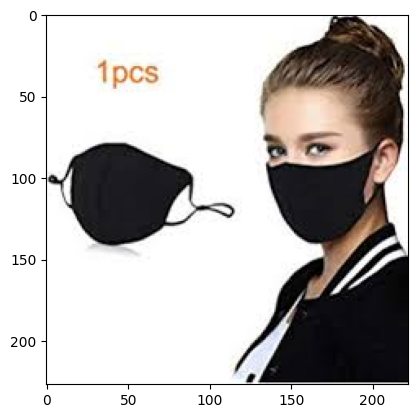

(227, 222, 3)


In [ ]:
#displaying images
#using matplotlib or we can use cv2 too
img = mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_2242.jpg')

imgplot = plt.imshow(img)
plt.show()
print(img.shape)

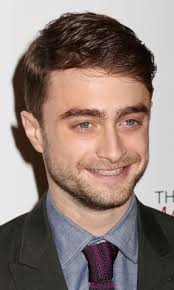

(290, 174, 3)


In [ ]:
#using cv2
this_img = cv2.imread('/content/face-mask-dataset/data/without_mask/without_mask_3405.jpg')
cv2_imshow(this_img)
print(this_img.shape)

## Sample Images from Dataset

In [ ]:
import matplotlib.image as mpimg
import random

sample_dir = train_dir + '/with_mask'
images = random.sample(os.listdir(sample_dir), 5)

plt.figure(figsize=(15, 5))
for i, img_name in enumerate(images):
    img_path = os.path.join(sample_dir, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("With Mask")
    plt.axis('off')
plt.show()


#image pre processing


Resize and convert imgs to numpy arrays

In [ ]:
with_mask_path = '/content/face-mask-dataset/data/with_mask/'

data = []
for imgs in with_mask:
  image = Image.open(with_mask_path + imgs)
  image = image.resize((128, 128))
  image = image.convert('RGB')              #using PIL and not open cv
  image = np.array(image)

  data.append(image)


In [ ]:
without_mask_path = '/content/face-mask-dataset/data/without_mask/'

for imgs in without_mask:
  image = Image.open(without_mask_path + imgs)
  image = image.resize((128, 128))            #using pillow now open cv
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

array([[[198, 163, 120],
        [200, 166, 120],
        [198, 164, 115],
        ...,
        [ 42,  65,  64],
        [ 47,  65,  67],
        [ 51,  68,  76]],

       [[199, 164, 120],
        [202, 168, 121],
        [197, 163, 114],
        ...,
        [ 45,  68,  69],
        [ 48,  66,  70],
        [ 49,  66,  75]],

       [[203, 169, 123],
        [203, 169, 121],
        [191, 157, 110],
        ...,
        [ 47,  69,  72],
        [ 50,  67,  72],
        [ 48,  65,  75]],

       ...,

       [[  1,  59, 122],
        [  1,  66, 126],
        [  0,  71, 129],
        ...,
        [ 10,  54,  71],
        [  1,  54,  74],
        [  0,  55,  75]],

       [[  2,  60, 123],
        [  2,  68, 128],
        [  0,  71, 130],
        ...,
        [ 11,  52,  73],
        [  3,  50,  74],
        [  0,  47,  72]],

       [[  2,  58, 121],
        [  3,  68, 129],
        [  0,  70, 129],
        ...,
        [ 12,  51,  76],
        [  6,  47,  78],
        [  4,  41,  73]]], dtype=uint8)
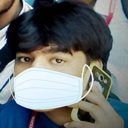

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting list-data into np array

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
Y.shape

(7553,)

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
#train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


scaling the data

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

to make it smaller, cuz 255 etc is huge
makes the range between 0 and 1 instead of 0 and 255
white - 1 and black - 0

array([[[ 69, 109, 145],
        [ 74, 116, 151],
        [ 65, 109, 144],
        ...,
        [229, 231, 244],
        [232, 229, 241],
        [236, 230, 241]],

       [[ 68, 107, 142],
        [ 64, 105, 138],
        [ 58, 101, 135],
        ...,
        [227, 229, 242],
        [235, 233, 245],
        [234, 230, 241]],

       [[ 53,  91, 124],
        [ 61, 100, 130],
        [ 60, 102, 133],
        ...,
        [225, 230, 243],
        [232, 232, 244],
        [233, 231, 242]],

       ...,

       [[ 76, 121, 163],
        [ 79, 126, 168],
        [ 86, 134, 176],
        ...,
        [241, 255, 255],
        [241, 254, 254],
        [242, 254, 254]],

       [[ 84, 127, 168],
        [ 83, 129, 169],
        [ 78, 126, 166],
        ...,
        [243, 255, 254],
        [242, 254, 252],
        [243, 255, 253]],

       [[ 83, 130, 170],
        [ 81, 129, 169],
        [ 82, 132, 172],
        ...,
        [246, 253, 254],
        [243, 253, 253],
        [242, 254, 253]]], dtype=uint8)
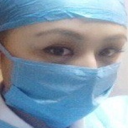

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.27058824, 0.42745098, 0.56862745],
        [0.29019608, 0.45490196, 0.59215686],
        [0.25490196, 0.42745098, 0.56470588],
        ...,
        [0.89803922, 0.90588235, 0.95686275],
        [0.90980392, 0.89803922, 0.94509804],
        [0.9254902 , 0.90196078, 0.94509804]],

       [[0.26666667, 0.41960784, 0.55686275],
        [0.25098039, 0.41176471, 0.54117647],
        [0.22745098, 0.39607843, 0.52941176],
        ...,
        [0.89019608, 0.89803922, 0.94901961],
        [0.92156863, 0.91372549, 0.96078431],
        [0.91764706, 0.90196078, 0.94509804]],

       [[0.20784314, 0.35686275, 0.48627451],
        [0.23921569, 0.39215686, 0.50980392],
        [0.23529412, 0.4       , 0.52156863],
        ...,
        [0.88235294, 0.90196078, 0.95294118],
        [0.90980392, 0.90980392, 0.95686275],
        [0.91372549, 0.90588235, 0.94901961]],

       ...,

       [[0.29803922, 0.4745098 , 0.63921569],
        [0.30980392, 0.49411765, 0.65882353],
        [0.3372549 , 0

## Augmentation Preview

In [ ]:

aug_iter = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                             batch_size=1, class_mode='binary')
x_batch, y_batch = next(aug_iter)
plt.figure(figsize=(6,6))
for i in range(1, 4):
    plt.subplot(1,3,i)
    plt.imshow(x_batch[0].astype("uint8"))
    plt.title(f"Augmented Image")
    plt.axis("off")
plt.tight_layout()
plt.show()


#building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#no. of classes = mask and without mask
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) #input layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))                  #to counter overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='sigmoid')) #output layer

In [ ]:
#compiling the nn

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
#training the nn

trained_model = model.fit(X_train_scaled, Y_train, validation_split= 0.1, epochs = 10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - acc: 0.7212 - loss: 0.6088 - val_acc: 0.8909 - val_loss: 0.2766
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8884 - loss: 0.2906 - val_acc: 0.9091 - val_loss: 0.2466
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9022 - loss: 0.2531 - val_acc: 0.9091 - val_loss: 0.2220
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9151 - loss: 0.2186 - val_acc: 0.9190 - val_loss: 0.1926
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9368 - loss: 0.1714 - val_acc: 0.9289 - val_loss: 0.2075
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9457 - loss: 0.1412 - val_acc: 0.9008 - val_loss: 0.2563
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9504 - loss: 0.1312 - val_acc: 0.9388 - val_loss: 0.1910
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9558 - loss: 0.1057 - val_acc: 0.9339 - val_loss: 0.1742
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16m

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9304 - loss: 0.2670
Test Accuracy = 0.9331568479537964


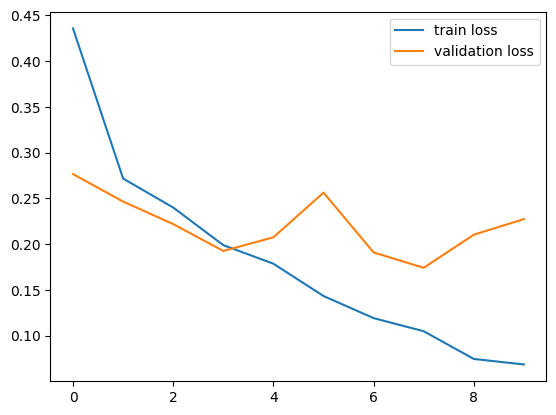

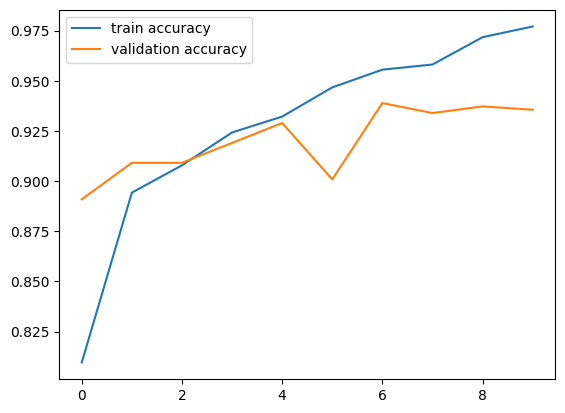

In [ ]:
h = trained_model

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#predictive system of CNN

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

## Model Using MobileNetV2 Transfer Learning

this gives higher accuracy and is useful for transfer learning, with fewer epochs

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

## Train the Model

In [ ]:
history = model.fit(train_generator, validation_data=val_generator,
                    epochs=5, steps_per_epoch=100, validation_steps=50)

## Improved Accuracy & Loss Plot

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation: Confusion Matrix & Report

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = (preds > 0.5).astype(int)
y_true = val_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['With Mask', 'Without Mask']))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['With Mask', 'Without Mask'],
            yticklabels=['With Mask', 'Without Mask'], cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
